# Project - Programming for Data Analysis
***


### References
***
**Road Safty Authority (RSA)**       
    - www.rsa.ie/en/RSA/Road-Safety/Our-Research/Deaths-injuries-on-Irish-roads  
    - www.rsa.ie/Documents 
**Irish Times** 
    - https://www.irishtimes.com/news/environment/crash-report
**Technical References**       
    - http://pandas.pydata.org/pandas-docs/stable/
    - https://docs.scipy.org/doc/numpy/reference/routines.random.html
    - https://www.bogotobogo.com/python/python_fncs_map_filter_reduce.php
    - https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
    - http://effbot.org/zone/python-list.htm
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.truncnorm.html
    - https://pypi.org/project/pandasql/
***

***

### Real Scenario based on the facts captured by RSA <br> <br>

The below summmary is based on the road accidents statistics prepared by the Road Saftey Authority in the year 2016.

    - There were 175 fatal collisions happened in the Irish roads which resulted in 187 fatalities
    - 13% more collisions and 15% more deaths compared to the previous year (2015)
    - Maximum number of fatalities occured in counties Dublin and Cork
    - Highest fatalities occured in the age group "66 and above"
    - Maximum fatalities occured for the road user type "Driver"
    - Maximum number of fatalities occured on the week day "Sunday"

***
### Project - Scope and Summary <br> <br>
This project is inspired from the above real world scenario. The objectives of the projects are listed below

    - Generate 100 data sets using the python random sampling functions
    - Each data set to contain 6 variables 
    
               - Irish counties where the accident took place
               - Age group of the Driver [ Traditionalists, Baby Boomers, Gen-Y]
               - Type of the Vehicle [Car, Van, Bus, Lorry, bi-cycle, Jeep]
               - Road Type [Two-way single carriageway, One-way single carriageway, Dual Carriageway]
               - Weather on the particular day [Sunny, Rainy, Snow, Windy, cloudy]
        
    - Investigate the types of variables involved, their likely distributions, and their relationships with each other.
     
***

***
### Project - Contents
The dataset creation code is divided into 3 sections
    - Section 1 : Reference dataset creation for the variables
    - Section 2 : Use distribution functions to create the dataset (100 records) 
    - Section 3 : Use pre-determined rules to populate the number of accidents for the random variable combination
    - Section 4 : Plot the relations between different variables using Seaborn library
***


***
**Section 1** <br>
    - Create the reference dataset for the different variables (Panda List) as set out in the project description above
        - The Irish Counties are loaded from JSON files
        - The rest of the refernces datasets are hardcoded within the below python code
        - Print the reference data set (except counties)
 
        
***

In [1]:
#***************************************************************************#
#**************************** SECTION 1 STARTS HERE ************************#
#***************************************************************************#

#Import Pandas library
import pandas as pd

# Variable 1 - Counties
# The irish counties are stored in the Json file
# Create a dataframe for the irish counties
url = "https://raw.githubusercontent.com/SomanathanSubramaniyan/PDA-Project/master/Counties.json"
df_counties = pd.read_json(url, orient='columns')

# Variable 2 - Age group of the Driver
# Create a  list for the AgeGroup
#AgeGroup =[ 'Baby Boomers',  'Traditionalists','Gen-Y', 'Gen-Z','Gen-X',]
AgeGroup =[ 'Baby Boomers',  'Traditionalists','Gen-Y']

# Variable 3 - Type of the Vehicle
# Create a  list for different type of vechicles
VehicleType = ['Van', 'Bus', 'bi-cycle', 'Car','SUV', 'Lorry']

# Variable 4 - Road type
# Create a  list for different Road Types
RoadType = ['Two-way single carriageway', 'One-way single carriageway', 'Dual Carriageway']

# Variable 5 - weather
# Create a  list for different weather scenarios
Weather = ['Sunny','Cloudy','Rainy', 'Windy','Snow']

print ("\n")
print ("*** Reference Variables used in this project ***")
print ("\n")
print ("Age Group     "+ " : "+ '{0!r}'.format(AgeGroup))
print ("Vehicle Type  "+ " : "+ '{0!r}'.format(VehicleType))
print ("Road Type     "+ " : "+ '{0!r}'.format(RoadType))
print ("Weather       "+ " : "+ '{0!r}'.format(Weather))

#***************************************************************************#
#**************************** SECTION 1 ENDS HERE ************************#
#***************************************************************************#



*** Reference Variables used in this project ***


Age Group      : ['Baby Boomers', 'Traditionalists', 'Gen-Y']
Vehicle Type   : ['Van', 'Bus', 'bi-cycle', 'Car', 'SUV', 'Lorry']
Road Type      : ['Two-way single carriageway', 'One-way single carriageway', 'Dual Carriageway']
Weather        : ['Sunny', 'Cloudy', 'Rainy', 'Windy', 'Snow']


***
**Section 2** <br>

    - Use Uniform, Normal and Poisson distributions to randomly choose the reference variables
        - Uniform Distribution : County random data selection from the reference set
        - Normal Distribution  : Age Group random data selection from the reference set
        - Poisson Distribution : Vehicle, Road type and Weather random data selection from the reference set
    - Choose the distribution function parameters so that the random selection largly reflect the real world scenario
    - Create 100 dataset for all the 5 variables using a for loop
    - Remove any duplicate in the dataset        
***

In [2]:
#***************************************************************************#
#**************************** SECTION 2 STARTS HERE ************************#
#***************************************************************************#

# Create dataframe for variables county, Agegroup, VehicleType,Road Type, Weather and Number of accidents
# User for loop to create a 100 data set
# import the pandasql to identify the unique records in the dataframe

from scipy.stats import truncnorm,poisson, uniform
from pandasql import sqldf

import numpy as np
import random
import pandas as pd

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from IPython.display import display, HTML

# Function to return the truncated NORMAL random values
# the upper and the lower values are within expected range

def truncatednormal(mu=0, sigma=1, low=0, upp=10):
    return truncnorm( (low - mu)/sigma, (upp - mu)/ sigma, mu, sigma)

# Function to return the POISSON random values
# the upper and the lower values are within expected range

def tpoisson(sample_size=1, maxval=5, mu=3.2):
    cutoff = poisson.cdf(maxval, mu)
    u = uniform.rvs(scale=cutoff, size= sample_size)
    y = poisson.ppf(u, mu)
    return y

dataset = pd.DataFrame(columns=['County','AgeGroup','VehicleType','RoadType', 'Weather','NoofAccidents'])

### Variable 1  -- County ###
# Use UNIFORM DISTRIBUTION to populate the county column in the dataframe
# this ensures all the country are equally represented in the dataset.
# On average 31 distinct counties out of 32 are populated using logic during each execution
# Use round and integer functions to convert the float result to the nearest integer.

for x in range(100):
    icounty = int(round(random.uniform(0,31),0))
    dataset.loc[x,'County'] = df_counties.at[icounty,0]

# County - Unique value and their counts - results of the UNIFORM random distribution
dataset.County.value_counts()
    
### Variable 2  -- Age Group of the Driver ###
# Use TRUNCATED NORMAL DISTRIBUTION to populate the Age Group column in the dataframe
# this ensures most of the data set has "Gen-Y" or "Gen-X"
# Use round and integer functions to convert the float result to the nearest integer.

for x in range(100):
    y = truncatednormal(2.2,1,0,2)
    iAG = y.rvs(1)
    z = int(round(iAG[0],0))
    dataset.loc[x,'AgeGroup'] = AgeGroup[z]
    
# Age Group - Unique value and their counts - results of the Normal random distribution
dataset.AgeGroup.value_counts()

### Variable 3, Variable 4 and Varibale 5  -- Vehicle Type, Road Type and Weather ###
# Use POISSON DISTRIBUTION to populate the Vechicle, Road Type and weather from the reference data
# this ensures most of the data set has values as "car", "SUV" and "bi-cycle"

for x in range(100):
    # call function tpoisson and pass the size, upper limite and mu parameters
    y = tpoisson(1,5,3.2)
    dataset.loc[x,'VehicleType'] = VehicleType[int(y)]
    # call function tpoisson and pass the size, upper limite and mu parameters
    y = tpoisson(1,4,1.5)
    dataset.loc[x,'Weather'] = Weather[int(y)]
    # call function tpoisson and pass the size, upper limite and mu parameters
    y = tpoisson(1,2,0.5)
    dataset.loc[x,'RoadType'] = RoadType[int(y)]    

#Drop the duplicate records from the dataset
dataset.drop_duplicates(subset=['County', 'AgeGroup','VehicleType','Weather','RoadType','NoofAccidents'])

#***************************************************************************#
#**************************** SECTION 2 ENDS HERE ************************#
#***************************************************************************#


,County,AgeGroup,VehicleType,RoadType,Weather,NoofAccidents
0,Offaly,Traditionalists,bi-cycle,Two-way single carriageway,Rainy,NaN
1,Limerick,Traditionalists,bi-cycle,Two-way single carriageway,Cloudy,NaN
2,Limerick,Traditionalists,bi-cycle,Two-way single carriageway,Windy,NaN
3,Longford,Traditionalists,Bus,One-way single carriageway,Sunny,NaN
4,Tyrone,Traditionalists,Lorry,One-way single carriageway,Cloudy,NaN
5,Offaly,Baby Boomers,SUV,Two-way single carriageway,Cloudy,NaN
6,Cork,Traditionalists,SUV,One-way single carriageway,Rainy,NaN
7,Down,Traditionalists,Bus,Two-way single carriageway,Cloudy,NaN
8,Wexford,Traditionalists,Car,One-way single carriageway,Windy,NaN
9,Roscommon,Traditionalists,SUV,One-way single carriageway,Rainy,NaN


***
**Section 3** <br>

Populate the number of accidents based rules defined in this section. The below facts are based on RSA.ie website. Road deaths in the years 2015,2016 and 2017

    - Maximum number of death in road accidents happened in the counties Dublin, cork, Donegal and Maya [RSA.ie]
    - Maximum number of death in road accidents involve Generation Z and the Traditionalist
    - Maximum number of death in road accidents happend "Two-Way" single carriageway
      
***

In [3]:
#***************************************************************************#
#**************************** SECTION 3 STARTS HERE ************************#
#***************************************************************************#

#The below rules are based on the assumption that more number of accidents happen on the below conditions
# weather -- rain, Wind and snow
# Vechicle type -- car and SUV

mCounty = ['Kildare','Dublin','Cork','Mayo']
mAgeGroup = ['Traditionalists', 'Gen-Z']
mVehicleType = ['Car','SUV']
mRoadType = ['Two-way single carriageway', 'One-way single carriageway']
mWeather = ['Rainy', 'Windy','Snow']

for index, row in dataset.iterrows():
    if (row['County'] in mCounty) and (row['AgeGroup'] in mAgeGroup) and (row['VehicleType'] in mVehicleType) and \
            (row['RoadType'] in mRoadType) and (row['Weather'] in mWeather):
        row['NoofAccidents'] = random.randint(15,50)
    elif (row['County'] in mCounty) and (row['AgeGroup'] in mAgeGroup) and (row['VehicleType'] in mVehicleType) and \
            (row['RoadType'] in mRoadType):
        row['NoofAccidents'] = random.randint(15,40)
    elif (row['County'] in mCounty) and (row['AgeGroup'] in mAgeGroup) and (row['VehicleType'] in mVehicleType):
        row['NoofAccidents'] = random.randint(15,35)      
    elif (row['County'] in mCounty) and (row['AgeGroup'] in mAgeGroup):
        row['NoofAccidents'] = random.randint(5,30) 
    elif (row['County'] in mCounty):
        row['NoofAccidents'] = random.randint(5,20) 
    else:
        row['NoofAccidents'] = random.randint(1, 10)
        
#Print the dataset        
dataset

#***************************************************************************#
#**************************** SECTION 3 ENDS HERE ************************#
#***************************************************************************#   

,County,AgeGroup,VehicleType,RoadType,Weather,NoofAccidents
0,Offaly,Traditionalists,bi-cycle,Two-way single carriageway,Rainy,10
1,Limerick,Traditionalists,bi-cycle,Two-way single carriageway,Cloudy,4
2,Limerick,Traditionalists,bi-cycle,Two-way single carriageway,Windy,3
3,Longford,Traditionalists,Bus,One-way single carriageway,Sunny,5
4,Tyrone,Traditionalists,Lorry,One-way single carriageway,Cloudy,3
5,Offaly,Baby Boomers,SUV,Two-way single carriageway,Cloudy,9
6,Cork,Traditionalists,SUV,One-way single carriageway,Rainy,48
7,Down,Traditionalists,Bus,Two-way single carriageway,Cloudy,1
8,Wexford,Traditionalists,Car,One-way single carriageway,Windy,2
9,Roscommon,Traditionalists,SUV,One-way single carriageway,Rainy,5


***
**Section 4** <br>

    - Plot Seaboran graps which shows the relation between below 3 variables
        - Road Type (Dual Carriage way, One Way Single Carriage way, Two Way Single Carriage way)
        - Weather
        - Number of Accidents
    
    - Plot Seaboran graps which shows the relation between below 3 variables
        - Age Group (Gen Y, Traditionalist and Baby Boomers)
        - Weather
        - Number of Accidents
 
        
***

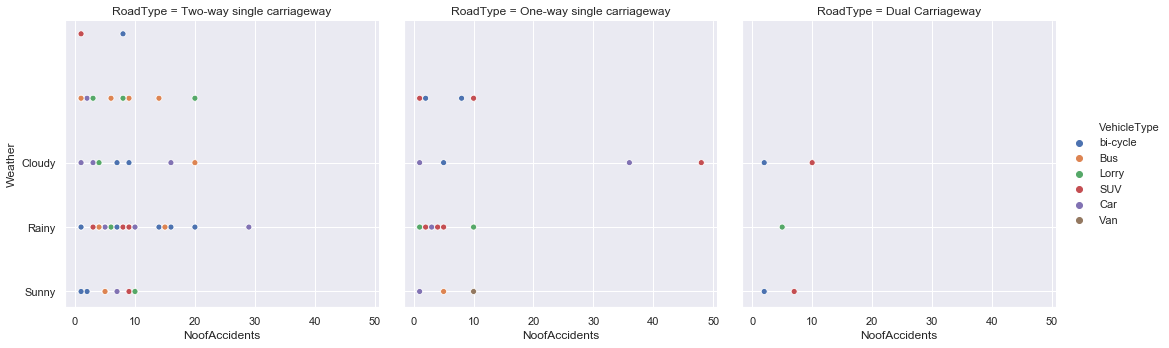

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.relplot(x='NoofAccidents', y='Weather', hue='VehicleType', col='RoadType',data=dataset)


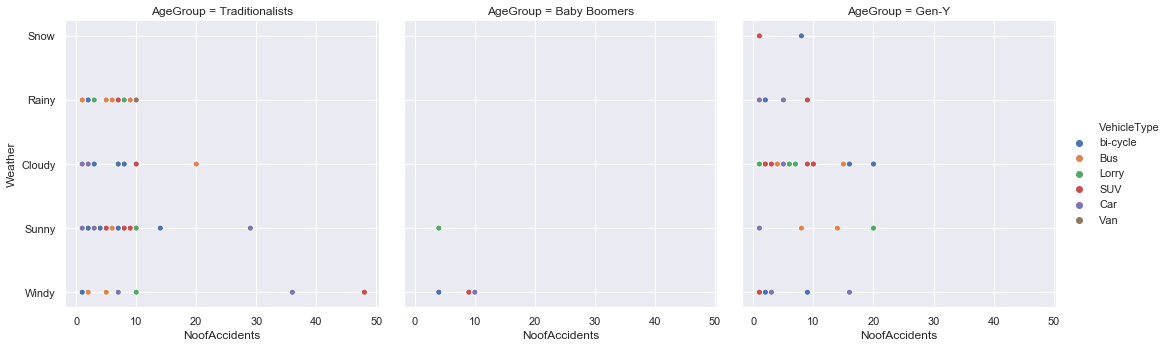

In [5]:
sns.set(style="darkgrid")
sns.relplot(x='NoofAccidents', y='Weather', hue='VehicleType', col='AgeGroup',data=dataset)

## END